In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [131]:
data=pd.read_csv("train.csv")
#data.info()
data=data.drop(columns='Id')


Mean encoding non numeric data

In [132]:
non_numeric_data=pd.DataFrame()
for i in data.columns:
    if not pd.api.types.is_numeric_dtype(data[i]):
        non_numeric_data[i]=data[i]
non_numeric_data=non_numeric_data.fillna("Null")
non_numeric_data['SalePrice']=data['SalePrice']
        
for i in non_numeric_data.columns[:-1]:
    
    mean_dict=non_numeric_data.groupby([i])['SalePrice'].mean().to_dict()
    non_numeric_data[i]=non_numeric_data[i].map(mean_dict)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(non_numeric_data)
non_numeric_data=pd.DataFrame(data=scaled_data,columns=non_numeric_data.columns)

non_numeric_data['SalePrice']=data['SalePrice']
for i in non_numeric_data.columns:
    data[i]=non_numeric_data[i]
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0.387164,65.0,8450,0.064238,0.223091,-0.736599,-0.057819,0.02618,-0.345949,...,0,-0.044675,0.445425,0.168392,0,2,2008,-0.255541,-0.195636,208500
1,20,0.387164,80.0,9600,0.064238,0.223091,-0.736599,-0.057819,0.02618,-0.259398,...,0,-0.044675,0.445425,0.168392,0,5,2007,-0.255541,-0.195636,181500
2,60,0.387164,68.0,11250,0.064238,0.223091,1.147313,-0.057819,0.02618,-0.345949,...,0,-0.044675,0.445425,0.168392,0,9,2008,-0.255541,-0.195636,223500
3,70,0.387164,60.0,9550,0.064238,0.223091,1.147313,-0.057819,0.02618,0.060991,...,0,-0.044675,0.445425,0.168392,0,2,2006,-0.255541,-1.176577,140000
4,60,0.387164,84.0,14260,0.064238,0.223091,1.147313,-0.057819,0.02618,-0.259398,...,0,-0.044675,0.445425,0.168392,0,12,2008,-0.255541,-0.195636,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,0.387164,62.0,7917,0.064238,0.223091,-0.736599,-0.057819,0.02618,-0.345949,...,0,-0.044675,0.445425,0.168392,0,8,2007,-0.255541,-0.195636,175000
1456,20,0.387164,85.0,13175,0.064238,0.223091,-0.736599,-0.057819,0.02618,-0.345949,...,0,-0.044675,-2.146513,0.168392,0,2,2010,-0.255541,-0.195636,210000
1457,70,0.387164,66.0,9042,0.064238,0.223091,-0.736599,-0.057819,0.02618,-0.345949,...,0,-0.044675,-0.133030,-4.449734,2500,5,2010,-0.255541,-0.195636,266500
1458,20,0.387164,68.0,9717,0.064238,0.223091,-0.736599,-0.057819,0.02618,-0.345949,...,0,-0.044675,0.445425,0.168392,0,4,2010,-0.255541,-0.195636,142125


<Axes: >

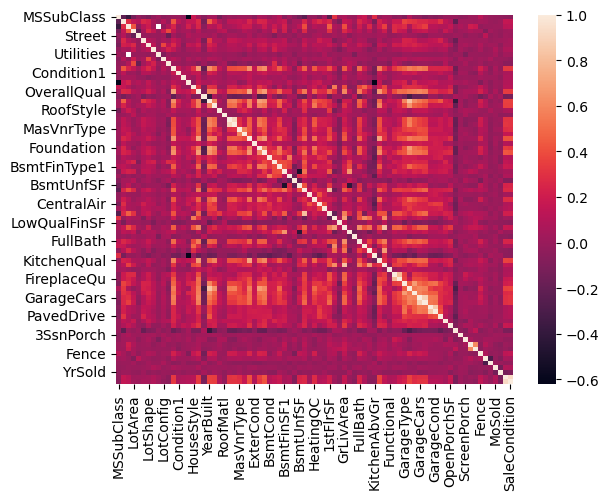

In [133]:
corrmat=data.drop(columns='SalePrice').corr()
sns.heatmap(corrmat)

In [134]:
scaler1=StandardScaler()
scaled_numeric=scaler1.fit_transform(data[[i for i in corrmat.columns]])
numeric_data=pd.DataFrame(data=scaled_numeric,columns=corrmat.columns)

In [135]:

numeric_data=numeric_data.fillna(0)

nan_count = corrmat.isna().sum()
corrmat=corrmat.fillna(0)

In [136]:
eigenvalue,eigenvector=np.linalg.eig(corrmat)

In [137]:
eigenvalue
idx=eigenvalue.argsort()[::-1]
eigenvalue[idx]
eigenvector=eigenvector[:,idx]
eigenvector

array([[ 1.19976317e-02,  7.54789413e-02, -2.13957944e-01, ...,
        -2.42473216e-02,  1.72524745e-05,  2.18393959e-03],
       [-1.10305733e-01, -4.24232012e-02,  7.44838778e-02, ...,
        -2.23147358e-02,  5.35754735e-05, -6.59267767e-04],
       [-9.15555551e-02,  1.39265502e-01,  2.19047399e-01, ...,
        -1.49810327e-02,  8.72346733e-05,  5.73412028e-03],
       ...,
       [ 7.26123149e-03, -2.72503885e-02,  1.15459383e-02, ...,
         1.48069484e-02,  9.08193197e-06,  1.04010218e-04],
       [-1.18151561e-01, -3.42805224e-02, -1.16469966e-01, ...,
         6.58179360e-01,  7.87912263e-07,  6.50156216e-04],
       [-1.19063869e-01, -4.13828487e-02, -1.10557893e-01, ...,
        -6.60914890e-01,  3.33770328e-05, -4.86283310e-04]])

In [138]:
explained_var=eigenvalue.cumsum()/eigenvalue.sum()
explained_var

array([0.18405254, 0.23638755, 0.28542811, 0.32178171, 0.35309506,
       0.38237609, 0.4062066 , 0.42863722, 0.44975379, 0.46955926,
       0.48817042, 0.50663611, 0.52413348, 0.54070443, 0.55655428,
       0.57199631, 0.58676424, 0.6013293 , 0.61577969, 0.62993861,
       0.64377964, 0.6573629 , 0.67018309, 0.68278923, 0.69533983,
       0.69533888, 0.69533888, 0.7077134 , 0.71966817, 0.73113562,
       0.74244818, 0.7535347 , 0.75440559, 0.76507207, 0.76610141,
       0.77648942, 0.77766151, 0.78780362, 0.7888862 , 0.79024412,
       0.79174218, 0.80168385, 0.81109495, 0.81296248, 0.81496959,
       0.8171154 , 0.82641844, 0.82875782, 0.83770741, 0.84652373,
       0.85513927, 0.85764395, 0.86042939, 0.86868569, 0.87163639,
       0.8747261 , 0.8779598 , 0.8858391 , 0.89383377, 0.9012351 ,
       0.90472853, 0.91177915, 0.91765614, 0.923158  , 0.92698915,
       0.9311093 , 0.93541569, 0.93987663, 0.94506604, 0.95216135,
       0.95684772, 0.96040099, 0.9669556 , 0.9732284 , 0.97799

In [139]:
n_components=np.argmax(explained_var>0.5)+1
n_components

12

In [140]:
selected=eigenvector[:,:n_components]
selected.shape

(79, 12)

In [141]:
numeric_data.shape

(1460, 79)

In [142]:
pca_data=pd.DataFrame(data=np.dot(numeric_data,selected))

In [148]:
pca_data['SalePrice']=data['SalePrice']
pca_data

,0,1,2,3,4,5,6,7,8,9,10,11,SalePrice
0,-2.837103,-0.397173,-2.356707,1.186542,-1.683110,-0.063212,0.402403,-1.405765,0.327658,-0.801176,-0.193530,-0.140029,208500
1,-0.058587,-0.705718,2.399996,0.769770,0.055418,0.817116,0.425334,0.601716,-0.829675,0.550661,-0.220163,0.204499,181500
2,-3.413074,-0.222733,-1.503746,1.146705,-1.286312,0.370964,-0.588278,-0.610273,0.683394,-0.364999,0.274667,-0.111825,223500
3,0.970930,1.312167,0.819840,1.510584,-0.114630,1.149313,1.096591,0.424975,0.765505,0.853006,0.843667,-1.558955,140000
4,-5.551311,1.752261,-0.677771,0.913435,-1.390537,0.139938,-0.500497,-0.124826,0.239846,-0.418493,0.253618,-0.069169,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-1.528444,0.347243,-2.523760,1.829374,0.812609,0.108457,-0.571321,-0.371171,-0.314524,0.099111,0.892934,-0.117766,175000
1456,-0.875410,0.604817,3.464083,-0.463666,0.566003,-1.682015,0.885095,-0.445540,-0.417474,-2.286081,-0.972690,0.052758,210000
1457,-1.873890,2.371921,-0.755311,1.484911,0.384619,2.636165,-0.625261,0.205266,-1.369096,-1.780908,-5.778676,-1.099194,266500
1458,2.808276,-1.972246,2.578180,-0.016047,-0.326337,-0.432600,0.120224,-1.240986,0.757368,-0.727068,-0.650887,-0.391886,142125


<Axes: >

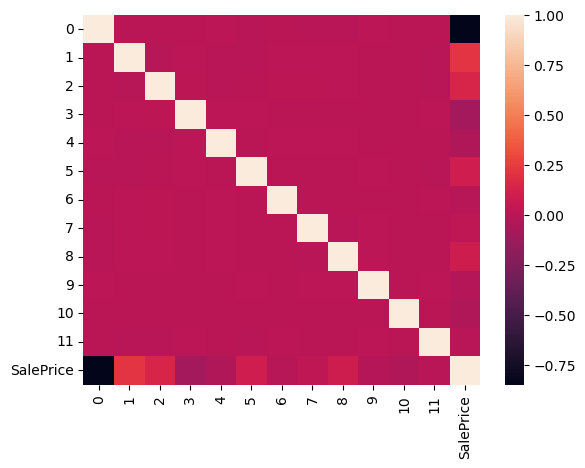

In [149]:

sns.heatmap(pca_data.corr())

In [151]:
x_train,x_test,y_train,y_test=train_test_split(pca_data.drop(columns='SalePrice'),pca_data['SalePrice'])


In [152]:
reg=RandomForestRegressor()
clf=reg.fit(x_train,y_train)

In [153]:
predicted=clf.predict(x_test)

In [154]:
prediction=pd.DataFrame()
prediction['actual']=y_test
prediction['prediction']=predicted

In [155]:
prediction.reset_index(inplace=True,drop=True)

In [156]:
prediction['percentage loss']=100*abs((prediction['prediction']-prediction['actual'])/prediction['actual'])
prediction

,actual,prediction,percentage loss
0,319900,292671.34,8.511616
1,174000,162817.52,6.426713
2,118000,101745.93,13.774636
3,182000,219524.53,20.617874
4,128200,135702.75,5.852379
...,...,...,...
360,538000,605095.47,12.471277
361,160000,159122.08,0.548700
362,123000,113557.46,7.676862
363,194500,192874.32,0.835825


In [157]:
print("avg loss:",prediction['percentage loss'].mean())

avg loss: 11.181665021484362
